Import dataset and setting up. We choose some of the features and get over other that are not appropriate such as full date. We did not make too many classes because the tree was too big or the accuracy was too small.

In [12]:
import pandas as pd
df = pd.read_csv("data.csv")

We select only one feature and set the target variable.

In [13]:
X = df[['temp']]
y = df['cnt']

Put the class values into 2 bins, to create 2 classes...

In [14]:
labels = ["0", "1"]
y_categorical = pd.cut(y, 2, labels=labels)
print(y_categorical.head())

0    0
1    0
2    0
3    0
4    0
Name: cnt, dtype: category
Categories (2, object): [0 < 1]


Scikit-learn does not offer a way to get the loss for each epoch, but it is printed in stdout. So replace stdout with a new stream, that holds the output in a string, which we will process later to get the loss for each epoch...


In [15]:
import sys
from io import StringIO

old_stdout = sys.stdout

sys.stdout = mystdout = StringIO()

We use only one example of our dataset

In [16]:
n = 1 ;# number of instances to keep
fX = X[:n].values
fy = y_categorical[:n].values



We are not going to use the linear regression package, we are going to use the stochastic gradient descent with suitable options, to get linear regression...

In [17]:
from sklearn.linear_model import SGDClassifier

learning_rate = 2 #it is the best value to choose...


sgd  = SGDClassifier(loss="squared_loss", learning_rate='constant', eta0=learning_rate, penalty=None, max_iter=1,
                     average=False, random_state=2018, verbose=1)
sgd2 = SGDClassifier(loss="log", learning_rate='constant', eta0=learning_rate, penalty=None, max_iter=1,
                     average=False, random_state=2018, verbose=1)


As we need to calculate also $y-\hat{y}$, we have put max_iter=1 to do only one step, and we will simulate the epochs with our loop, using partial_fit(), which does not re-initialise coefficients $\overrightarrow{w}$, and proceeds with the current ones (stored in the model).

In [18]:
import numpy as np

p_sum  = [] ;# this holds the sum of y-y_hat, for all instances (ok, we have only one instance)
p2_sum = []
epochs = 15 ;# number of epochs

for epoch in range(epochs):
    model = sgd.partial_fit(fX, fy, classes=labels)
    model2 = sgd2.partial_fit(fX, fy, classes=labels)
    y = model.predict(fX)
    p = model.decision_function(fX)
    c = (1 - np.mean(y == fy))
    p_sum.append(p)
    y2 = model2.predict(fX)
    p2 = model2.decision_function(fX)
    c2 = (1 - np.mean(y2 == fy))
    p2_sum.append(p2)


Restore the original stdout, and collect the loss from the prints in array loss_list:


In [19]:
sys.stdout = old_stdout
loss_history = mystdout.getvalue()
loss_list  = []
loss2_list = []
use_first = True
for line in loss_history.split('\n'):
    if(len(line.split("loss: ")) == 1):
        continue
    if use_first:
        loss_list.append(float(line.split("loss: ")[-1]))
    else:
        loss2_list.append(float(line.split("loss: ")[-1]))
    use_first = not use_first



Print the model coefficients:


In [20]:
print(model.coef_)
print(model2.coef_)

[[-7.77531449]]
[[-1.09013377]]


Print the loss function over epochs.

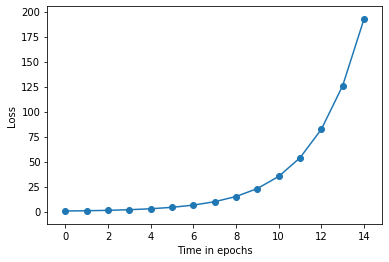

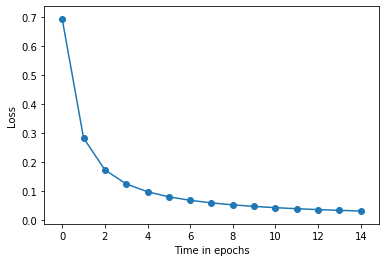

In [21]:
import matplotlib.pyplot as plt

plt.figure()
plt.plot(np.arange(len(loss_list)), loss_list)
plt.scatter(np.arange(len(loss_list)), loss_list)
plt.xlabel("Time in epochs")
plt.ylabel("Loss")
plt.show()
plt.figure()
plt.plot(np.arange(len(loss2_list)), loss2_list)
plt.scatter(np.arange(len(loss2_list)), loss2_list)
plt.xlabel("Time in epochs")
plt.ylabel("Loss")
plt.show()



Print loss with respect to $y-\hat{y}$

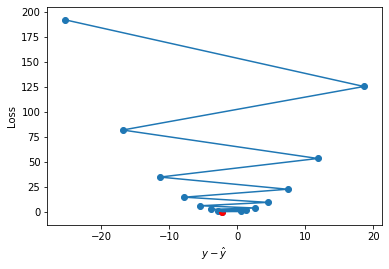

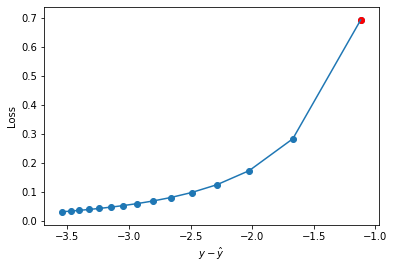

In [22]:
plt.figure()
plt.plot(p_sum, loss_list)
plt.scatter(p_sum, loss_list)
plt.scatter(p_sum[:1], loss_list[:1], color='red')
plt.xlabel("$y-\hat{y}$")
plt.ylabel("Loss")
plt.show()
plt.figure()
plt.plot(p2_sum, loss2_list)
plt.scatter(p2_sum, loss2_list)
plt.scatter(p2_sum[:1], loss2_list[:1], color='red')
plt.xlabel("$y-\hat{y}$")
plt.ylabel("Loss")
plt.show()
